<a href="https://colab.research.google.com/github/pgdinamica/ftd2024/blob/main/FTD_articula%C3%A7%C3%A3o_out2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FTD - Articulação Matemática - Outubro | 2024

## A matemática das imagens digitais

### Prof: Hallison Paz

### Criando imagens com programação

In [ ]:
# clique no ícone ▶️ ao lado para executar cada célula
from PIL import Image

In [ ]:
# Criando de uma imagem na proporção 2:3 (altura:comprimento)
altura = 400
comprimento = int(3 * altura / 2)
colombia = Image.new("RGB", (comprimento, altura))

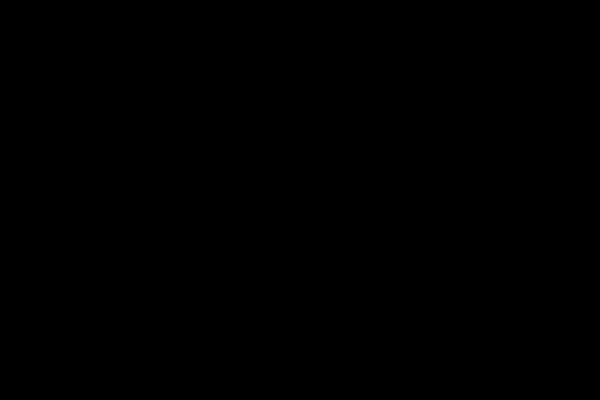

In [ ]:
# Exibe a imagem recém criada
colombia

In [ ]:
# Pintando os pixels na proporção 2:1:1 (amarelo:azul:vermelho)
AMARELO = (255, 205, 0)
AZUL = (0, 48, 135)
VERMELHO = (200, 16, 46)

parte = altura // 4
for y in range(altura):
  for x in range(comprimento):
    if y < 2 * parte:
      colombia.putpixel((x, y), AMARELO)
    elif y < 3 * parte:
      colombia.putpixel((x, y), AZUL)
    else:
      colombia.putpixel((x, y), VERMELHO)

# Salva um arquivo com a imagem da bandeira
colombia.save("bandeira_colombia.png")

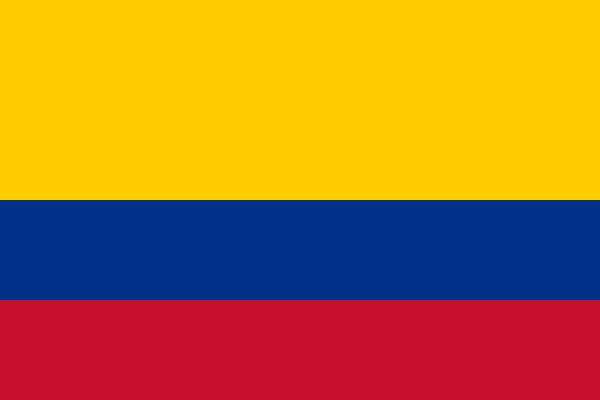

In [ ]:
# Exibe a bandeira da Colombia aqui no Colab
colombia

Manipulando...

In [20]:
# baixa a imagem do Palácio do Congresso Nacional
!wget https://raw.githubusercontent.com/pgdinamica/ftd2024/19a53f7b4d3fda69c0482927538974dacd063599/img/congresso.jpg

--2024-08-12 06:14:47--  https://raw.githubusercontent.com/pgdinamica/ftd2024/19a53f7b4d3fda69c0482927538974dacd063599/img/congresso.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57040 (56K) [image/jpeg]
Saving to: ‘congresso.jpg’

congresso.jpg       100%[===================>]  55.70K  --.-KB/s    in 0.01s   

2024-08-12 06:14:47 (4.19 MB/s) - ‘congresso.jpg’ saved [57040/57040]



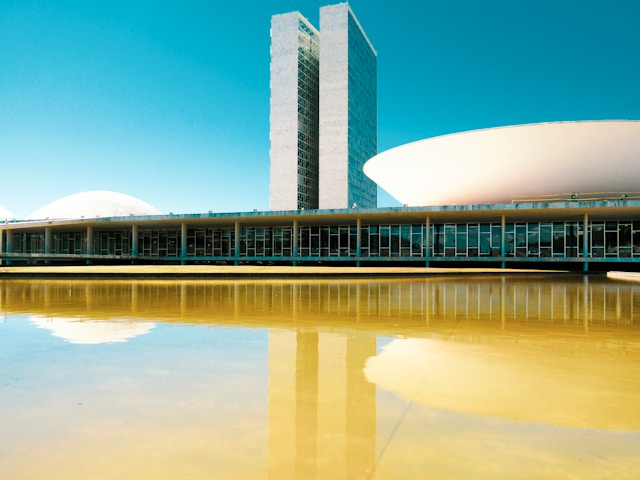

In [ ]:
# abrindo a imagem
congresso = Image.open("congresso.jpg")
# imagem original
congresso

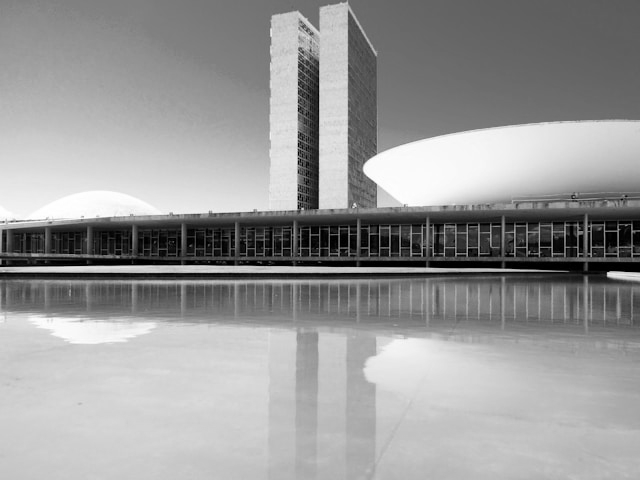

In [ ]:
# convertendo para escala de cinza
comprimento, altura = congresso.size
for y in range(altura):
  for x in range(comprimento):
    rgb = congresso.getpixel((x, y))
    media = (rgb[0] + rgb[1] + rgb[2]) // 3
    congresso.putpixel((x, y), (media, media, media))

congresso.save("congresso_cinza.png")
# em escala de cinza
congresso

In [ ]:
# Pega os valores de todos os pixels da imagem
pixels = congresso.load()

# núcleo de Sobel para detecção de arestas verticais
sobel_vertical = [[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]]

# Cria uma nova imagem para armazenar o resultado
sobel_img = Image.new("L", (comprimento, altura))
sobel_pixels = sobel_img.load()

for y in range(1, altura - 1):
    for x in range(1, comprimento - 1):
        gx = 0
        # Aplica o núcleo de Sobel
        for ky in range(-1, 2):
            for kx in range(-1, 2):
                pixel_value = pixels[x + kx, y + ky][0]
                kernel_value = sobel_vertical[ky + 1][kx + 1]
                gx += kernel_value * pixel_value

        # Calcula o valor absoluto e limita a 255
        sobel_pixels[x, y] = min(abs(gx), 255)

# Salva o resultado
sobel_img.save("arestas_congresso.jpg")

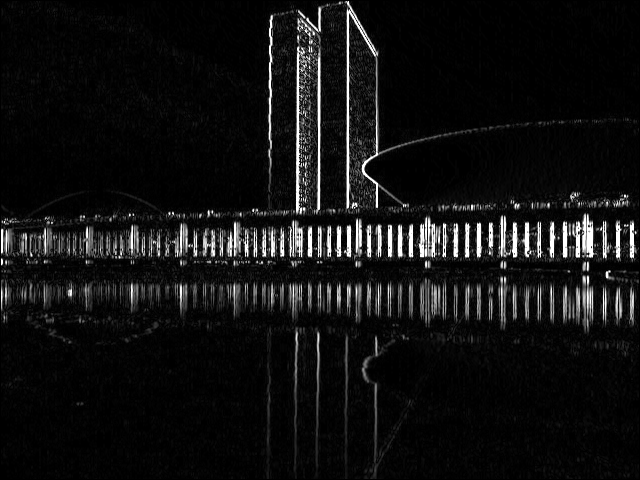

In [ ]:
sobel_img